In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [27]:
coor = np.random.rand(10,2)
x = []
y = []
for i in range(len(coor)):
    x = x + ([round(coor[i][0],6)])
    y = y + ([round(coor[i][1],6)])
print(x)
print(y)

[0.714503, 0.906259, 0.102746, 0.610289, 0.094999, 0.807277, 0.185775, 0.99952, 0.789463, 0.675383]
[0.00859, 0.199344, 0.601644, 0.976527, 0.453188, 0.801732, 0.548989, 0.056656, 0.484406, 0.561614]


In [28]:
#if weight increases then increases and loss<minloss
#calculate diff in loss
#if weight increases then increases but loss>minloss(not optimal loss)then go back to weight with most optimal loss and change direction

def adjustWeight(minloss,prevSignW,signW,learningRateW,change,W):#calculate change in loss if weight adjusted
    diff = 0
    
    while change:#Update W when change = True
        W = W + signW*learningRateW 
        return minloss,prevSignW,signW,learningRateW,change,W,diff
    
    while diff == 0:#Calculate loss when loss < minLoss
        loss = lossCalculation(x,y,W,B)
        
        if (prevSignW == signW) & (loss<minloss):
            diff = abs(minloss-loss)
            
        elif (prevSignW == signW) & (minloss<loss): 
            W = W - signW*learningRateW #go back to most optimal weight
            signW = -signW #flip sign
            learningRateW = learningRateW * 0.95 #decrease magnitude of change
            W = W + signW*learningRateW #calculate new weight
            loss = lossCalculation(x,y,W,B) #calculate new loss 
            if loss<minloss:#if loss good keep sign
                prevSignW = signW
                
    return minloss,prevSignW,signW,learningRateW,change,W,diff


def adjustBias(minloss,prevSignB,signB,learningRateB,change,B):#calculate change in loss if bias adjusted
    diff = 0
    
    while change:
        B = B + signB*learningRateB
        return minloss,prevSignB,signB,learningRateB,change,B,diff
    
    while diff == 0:
        loss = lossCalculation(x,y,W,B)
        
        if (prevSignB == signB) & (loss<minloss):
            diff = abs(minloss-loss)
            
        elif (prevSignB == signB) & (minloss<loss):
            B = B - signB*learningRateB
            signB = -signB
            learningRateB = learningRateB * 0.95
            B = B + signB*learningRateB
            loss = lossCalculation(x,y,W,B)
            if loss<minloss:
                prevSignB = signB  
                
    return minloss,prevSignB,signB,learningRateB,change,B,diff

    
def compareDiff(minloss,signW,signB,prevSignW,prevSignB,learningRateW,learningRateB,W,B,loss):
    minloss,prevSignB,signB,learningRateB,change,B,diffB = adjustBias(minloss,prevSignB,signB,learningRateB,False,B)
    minloss,prevSignW,signW,learningRateW,change,W,diffW = adjustWeight(minloss,prevSignW,signW,learningRateW,False,W)
    if diffB>diffW:
        minloss = loss
        minloss,prevSignB,signB,learningRateB,change,B,diffB = adjustBias(minloss,prevSignB,signB,learningRateB,True,B)
        return minloss,prevSignW,signW,prevSignB,signB,learningRateW,learningRateB,W,B,loss
    
    elif diffW>diffB:
        minloss = loss
        minloss,prevSignW,signW,learningRateW,change,W,diffW = adjustWeight(minloss,prevSignW,signW,learningRateW,True,W)
        return minloss,prevSignW,signW,prevSignB,signB,learningRateW,learningRateB,W,B,loss
    
    else:
        minloss = loss
        minloss,prevSignW,signW,learningRateW,change,W,diffW = adjustWeight(minloss,prevSignW,signW,learningRateW,True,W)
        return minloss,prevSignW,signW,prevSignB,signB,learningRateW,learningRateB,W,B,loss


In [29]:
minloss = 100000
signW = 1
prevSignW = 1
signB = 1
prevSignB = 1
learningRateW = 1
learningRateB = 1
W = 1
B = 1
loss = lossCalculation(x,y,W,B)
while (abs(minloss - loss) > 0.00000001):
    minloss,prevSignW,signW,prevSignB,signB,learningRateW,learningRateB,W,B,loss = compareDiff(minloss,signW,signB,prevSignW,prevSignB,learningRateW,learningRateB,W,B,loss)
    loss = lossCalculation(x,y,W,B)
print('The equation of best fit line is Y = '+str(round(W,5))+'X + '+str(round(B,5)))

The equation of best fit line is Y = -0.29969X + 0.64578


Text(0, 0.5, 'Y')

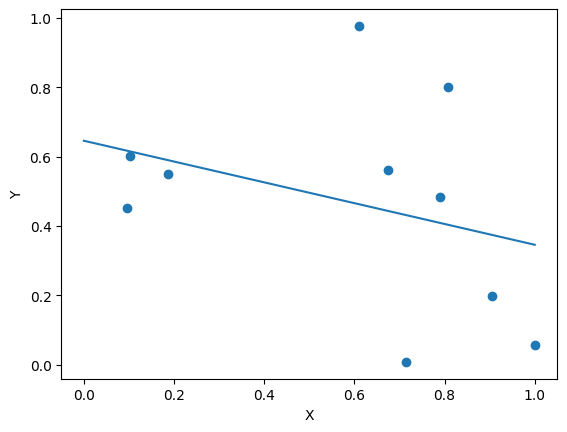

In [30]:
##Graphing Line
plt.scatter(x,y)
p = np.arange(0,2)
p1 = W*p + B
plt.plot(p,p1)

plt.xlabel('X')
plt.ylabel('Y')
